In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msn
from sklearn import preprocessing

About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved 

target : 0= less chance of heart attack 1= more chance of heart attack

Oldpeak: oldpeak = ST [Numeric value measured in depression]


**What are cardiovascular diseases?**

Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels. They include:

    -coronary heart disease – a disease of the blood vessels supplying the heart muscle;
    -cerebrovascular disease – a disease of the blood vessels supplying the brain;
    -peripheral arterial disease – a disease of blood vessels supplying the arms and legs;
    -rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;
    -congenital heart disease – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart -structure from birth; and
    -deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.

Heart attacks and strokes are usually acute events and are mainly caused by a blockage that prevents blood from flowing to the heart or brain. The most common reason for this is a build-up of fatty deposits on the inner walls of the blood vessels that supply the heart or brain. Strokes can be caused by bleeding from a blood vessel in the brain or from blood clots.

source: https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

In [18]:
df = pd.read_csv('./heart.csv')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [20]:
df.shape

(303, 14)

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [22]:
df.rename(columns= {"trtbps": "blood_pressure","chol": "cholesterol","thalachh": "maximun_heart_rate",
                    "exng": "exersice_induced_angina", "fbs": "fating_blood_sugar"}, inplace=True)

In [23]:
df.isna().sum()

age                        0
sex                        0
cp                         0
blood_pressure             0
cholesterol                0
fating_blood_sugar         0
restecg                    0
maximun_heart_rate         0
exersice_induced_angina    0
oldpeak                    0
slp                        0
caa                        0
thall                      0
output                     0
dtype: int64

In [24]:
dict = {}
for columns in list(df.columns):
    dict[columns]= df[columns].value_counts().shape[0]
    
pd.DataFrame(dict,index=["unique count"]).T


,unique count
age,41
sex,2
cp,4
blood_pressure,49
cholesterol,152
fating_blood_sugar,2
restecg,3
maximun_heart_rate,91
exersice_induced_angina,2
oldpeak,40


In [25]:
df.describe(exclude= 'category').T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fating_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
maximun_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exersice_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## **Exploratory Data Analysis (EDA)**

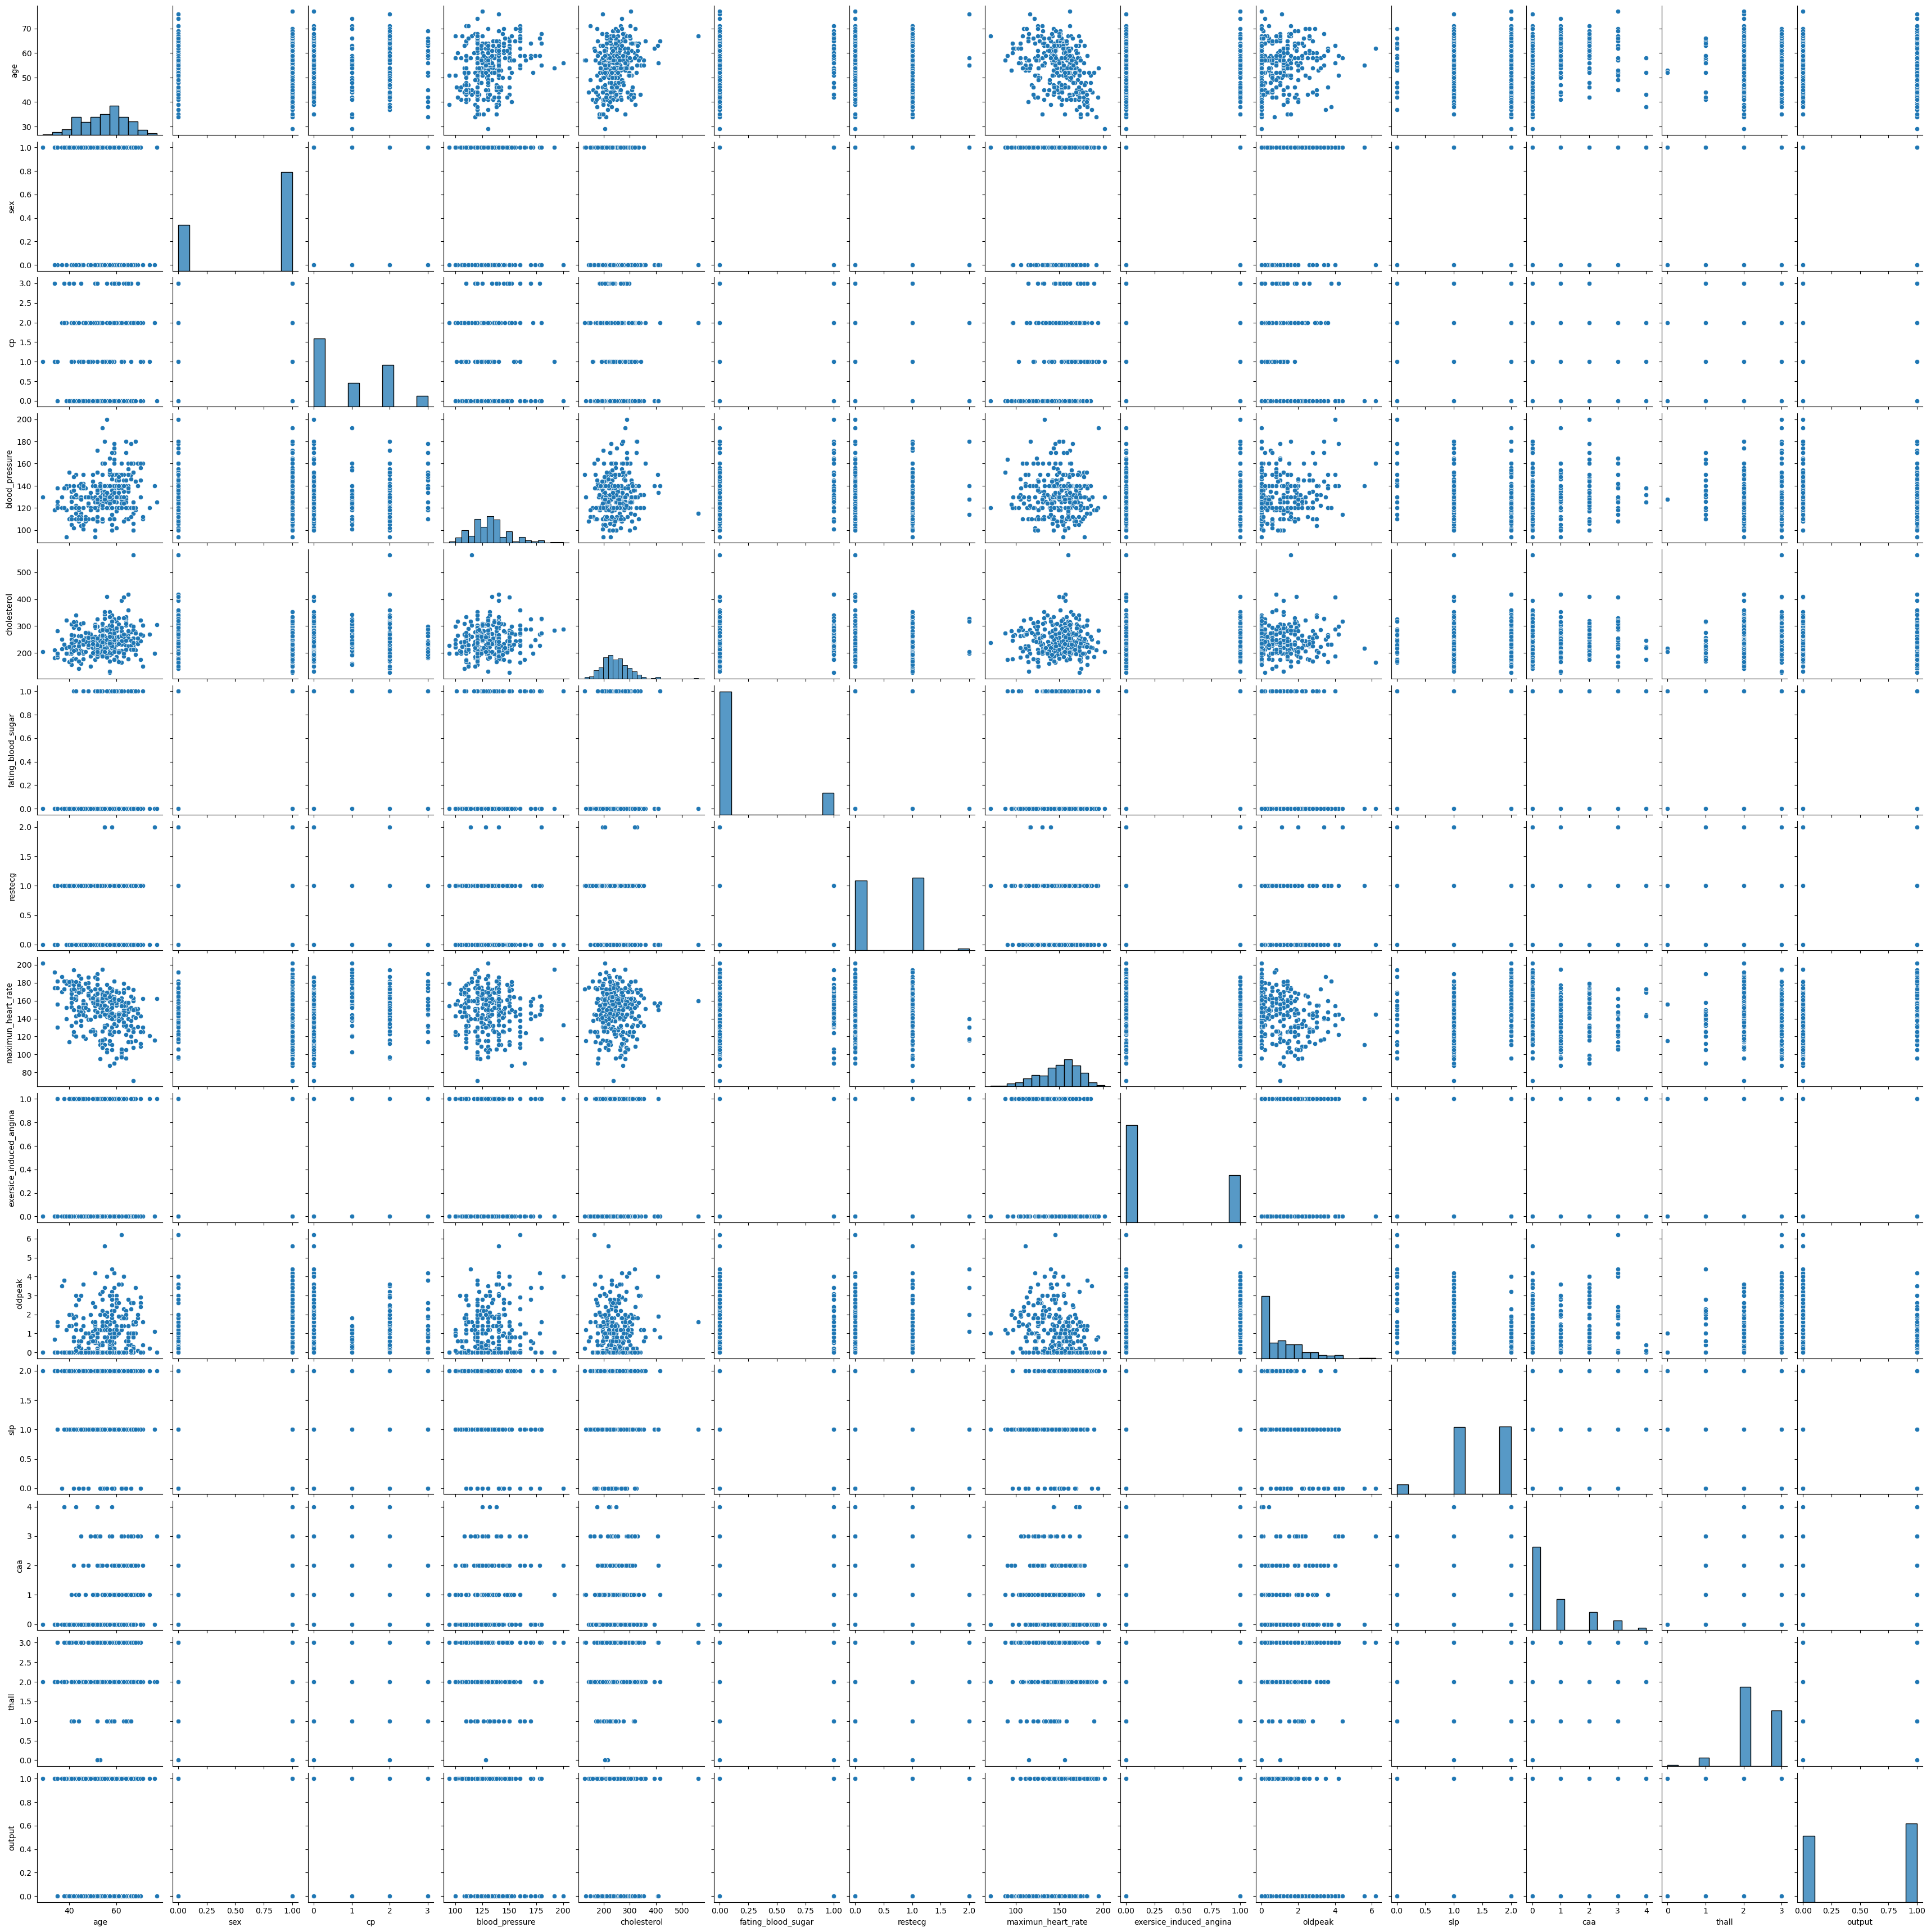

In [26]:
sns.pairplot(df)

<Axes: >

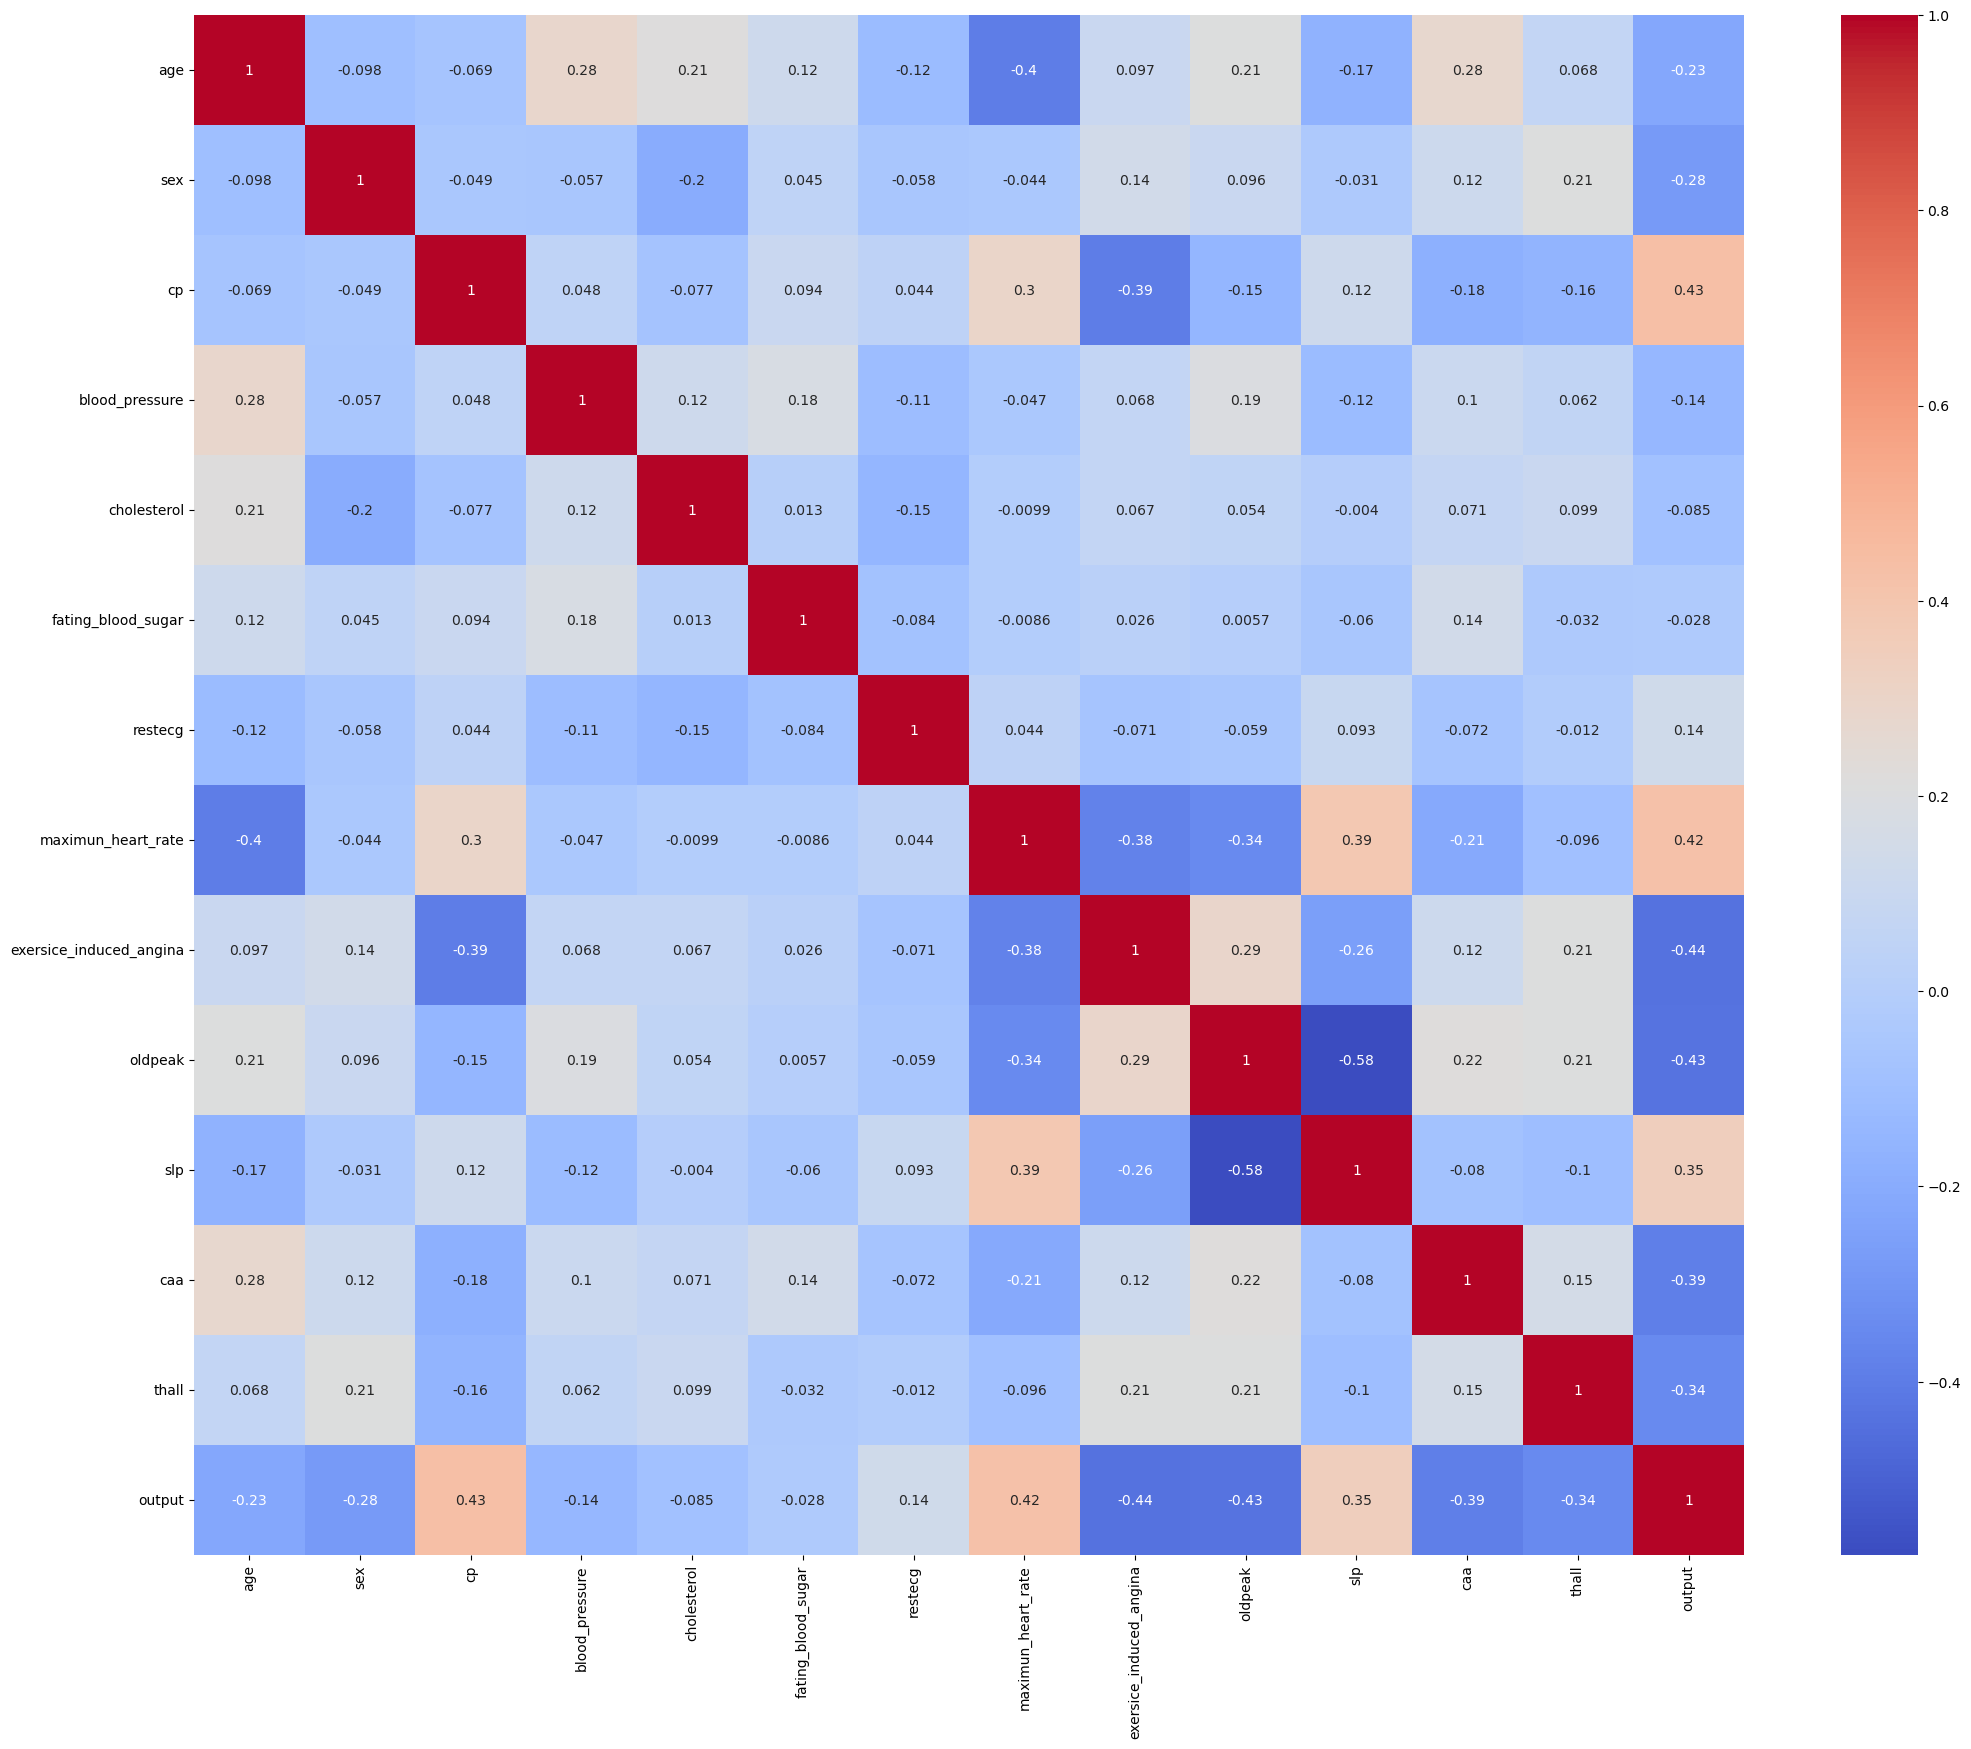

In [27]:
fig = plt.subplots(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')